<a href="https://colab.research.google.com/github/swopnimghimire-123123/Machine-Learning-Journey/blob/main/49_Regression_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression Metrics Explained

This section provides an explanation of common regression metrics, including their formulas, geometric intuition, advantages, and disadvantages.

### Mean Absolute Error (MAE)

*   **Formula:** $MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$
    *   $n$: Number of data points
    *   $y_i$: Actual value
    *   $\hat{y}_i$: Predicted value
*   **Geometric Intuition:** MAE represents the average of the absolute differences between the actual and predicted values. It measures the average vertical distance between the data points and the regression line.
*   **Advantages:**
    *   Easy to understand and interpret.
    *   Less sensitive to outliers compared to MSE and RMSE because it uses absolute differences instead of squared differences.
    *   The units of MAE are the same as the units of the target variable.
*   **Disadvantages:**
    *   The absolute value function is not differentiable at zero, which can make it challenging to use in optimization algorithms that rely on gradients.

### Mean Squared Error (MSE)

*   **Formula:** $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
*   **Geometric Intuition:** MSE represents the average of the squared differences between the actual and predicted values. It penalizes larger errors more heavily than smaller errors due to the squaring.
*   **Advantages:**
    *   Differentiable, which makes it suitable for optimization algorithms like gradient descent.
    *   Penalizes large errors more, which can be desirable in some cases.
*   **Disadvantages:**
    *   More sensitive to outliers compared to MAE.
    *   The units of MSE are the square of the units of the target variable, which can make it harder to interpret.

### Root Mean Squared Error (RMSE)

*   **Formula:** $RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} = \sqrt{MSE}$
*   **Geometric Intuition:** RMSE is the square root of MSE. It has the same units as the target variable, making it more interpretable than MSE. It also penalizes larger errors more heavily.
*   **Advantages:**
    *   Has the same units as the target variable, making it easy to interpret.
    *   Penalizes large errors more.
*   **Disadvantages:**
    *   Sensitive to outliers, similar to MSE.

### R-squared (R²) Score

*   **Formula:** $R^2 = 1 - \frac{SSE}{SST}$
    *   $SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ (Sum of Squared Errors or Residuals)
    *   $SST = \sum_{i=1}^{n} (y_i - \bar{y})^2$ (Total Sum of Squares, where $\bar{y}$ is the mean of the actual values)
*   **Geometric Intuition:** R² represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R² indicates that the model explains a larger proportion of the variance. It can be interpreted as how well the regression line fits the data points compared to a horizontal line representing the mean of the dependent variable.
*   **Advantages:**
    *   Provides a measure of how well the model fits the data, ranging from 0 to 1 (or sometimes negative for poor fits).
    *   Easy to understand and interpret as a percentage of variance explained.
*   **Disadvantages:**
    *   R² tends to increase as you add more independent variables to the model, even if they are not significant. This can lead to overfitting.
    *   Does not indicate whether the model is biased.

### Adjusted R-squared

*   **Formula:** $Adjusted\ R^2 = 1 - \frac{(1 - R^2)(n - 1)}{n - p - 1}$
    *   $n$: Number of data points
    *   $p$: Number of independent variables (predictors)
*   **Geometric Intuition:** Adjusted R² is a modified version of R² that accounts for the number of predictors in the model. It adjusts the R² value based on the degrees of freedom. It provides a more accurate measure of the model's fit, especially when comparing models with different numbers of predictors.
*   **Advantages:**
    *   Adjusts for the number of predictors, providing a more realistic measure of the model's fit.
    *   Does not always increase when adding new predictors, penalizing the addition of irrelevant variables.
*   **Disadvantages:**
    *   Can still be influenced by outliers.
    *   The interpretation is similar to R², but the adjustment makes it slightly less intuitive initially.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/49_placement (1).csv")

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
df.shape

(200, 2)

Text(0, 0.5, 'Package in LPA')

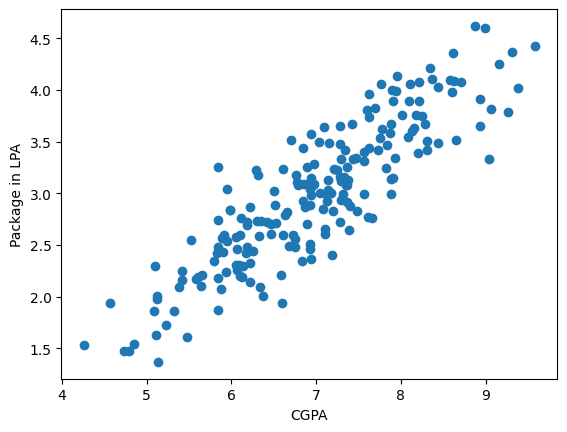

In [8]:
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")

In [9]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [11]:
X.sample(3)

,cgpa
9,8.31
118,7.40
180,6.19


In [12]:
y.sample(3)

,package
153,3.99
109,4.06
117,2.99


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package in LPA')

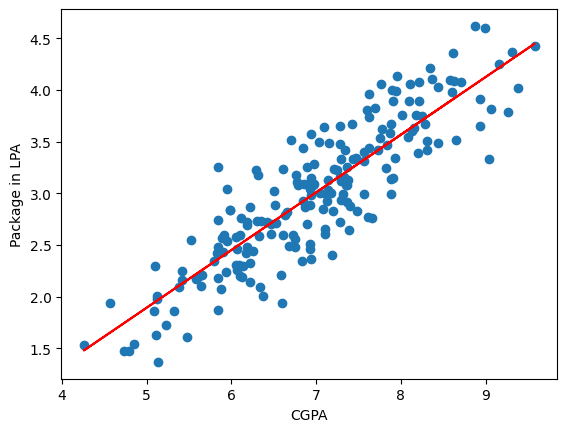

In [17]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(X_train,lr.predict(X_train),color="red")
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [20]:
y_pred = lr.predict(X_test)

In [21]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [23]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [25]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [26]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [27]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [28]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [29]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [30]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.387531,3.26
1,5.12,0.269341,1.98
2,7.82,0.075835,3.25
3,7.42,0.502995,3.67
4,6.94,0.703407,3.57


Text(0, 0.5, 'Package(in lpa)')

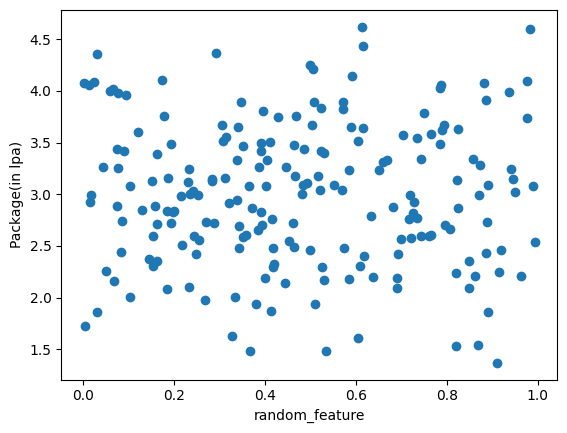

In [31]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [32]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:

lr = LinearRegression()

In [36]:
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(X_test)

In [38]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7718950538398212


In [39]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7595650567500818

In [40]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [41]:

new_df2.sample(5)

,cgpa,iq,package
139,7.19,3.30,2.40
168,8.65,4.02,3.52
72,7.78,2.62,3.62
119,7.39,2.95,2.65
74,6.85,3.34,3.44


Text(0, 0.5, 'Package(in lpa)')

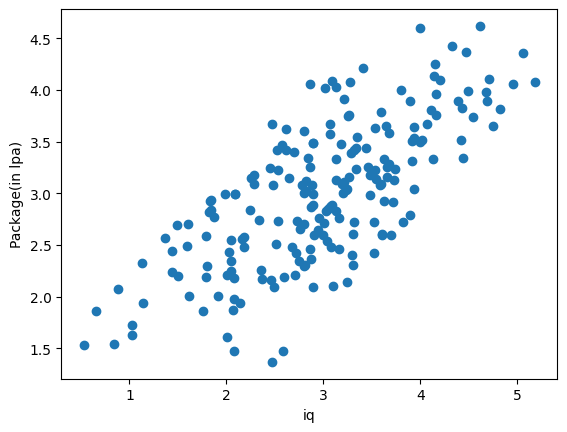

In [42]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [43]:
np.random.randint(-100,100)

57

In [44]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [46]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [47]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7944818170886414


In [48]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7833727261204598